In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [2]:
from tsfresh import extract_features

df = pd.read_csv('stock_price_scaled.csv', index_col='date', parse_dates=True)
# df = df['2022':'2023']
# df = extract_features(df, column_id='close')
# df = df.dropna(axis=1)
# df.head()
df_train = df.loc['2000':'2023-02']['close']
df_test = df.loc['2023-03':]['close']
print(f'{df_train.shape=}, {df_test.shape=}')

df_train.shape=(5671,), df_test.shape=(351,)


In [3]:
def reshape_data(data, window_size):
    x = []
    y = data[window_size:]
    for i in range(len(data) - window_size):
        x.append(data[i:(i + window_size)])
    return np.array(x), y

In [4]:
from tsfresh import extract_features



In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

train_x, train_y = reshape_data(df_train.values, 10)
test_x, test_y = reshape_data(df_test.values, 10)
print(f'{train_x.shape=}, {train_y.shape=}')

in_out_neurons = 1
hidden_neurons = 100
length_of_sequences = 10

model = Sequential()
model.add(LSTM(hidden_neurons, input_shape=(length_of_sequences, in_out_neurons), return_sequences=False))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(train_x, train_y, batch_size=100, epochs=20, validation_split=0.2)


train_x.shape=(5661, 10), train_y.shape=(5661,)
Epoch 1/20


c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1621 - val_loss: 0.0080
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0022


In [6]:
# print(test_x[-1])
# print(test_y[-1])
# print(f'{test_x.shape=}, {test_y.shape=}')
# print(df_test.values)

In [7]:
# model.summary()

In [8]:
# test = train_x[-1].reshape(1, 20)
# print()
# pred = np.array([])
# # np.append(pred,1)
# for i in range(10):
#     print(test)
#     pre = model.predict(test)
#     pred = np.append(pred, pre[0][0])
#     print(pred)
#     test = np.append(test.reshape(20), pre[0][0])
#     test = test[-20:].reshape(1, 20)
    
# print(pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


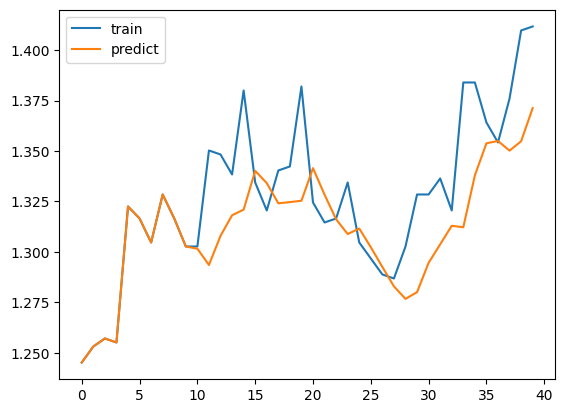

In [9]:
test_x, test_y = reshape_data(df_test.values, 10)

pre = model.predict(test_x)
plt.figure()
plt.plot(np.append(train_y[-10:], test_y[:30]), label='train')
plt.plot(np.append(train_y[-10:], pre[:30]), label='predict')
plt.legend()

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


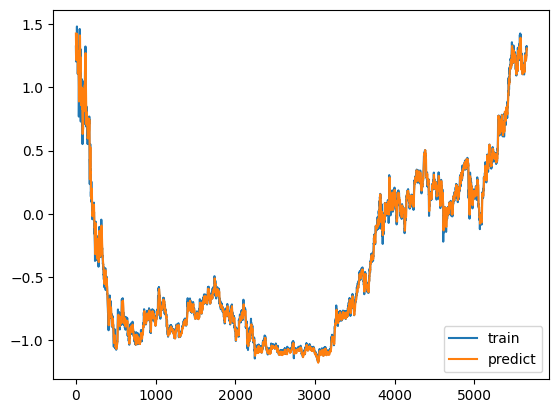

In [10]:
pre = model.predict(train_x)
plt.figure()
plt.plot(train_y, label='train')
plt.plot(pre, label='predict')
plt.legend()

In [11]:
loss = model.evaluate(test_x, test_y)
print(loss)
    

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
0.00258734542876482
